In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('SBI.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df = pd.DataFrame(data = df)
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e15276efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e152765978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15276ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e152765da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e152774390>],
 'means': []}

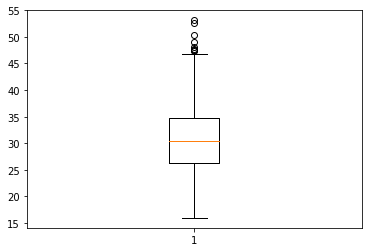

In [5]:
plt.boxplot(df['bmi'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1e1529b2940>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1529b2fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1529b2550>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1529bf6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1529bf9e8>],
 'means': []}

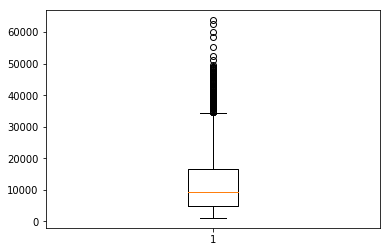

In [6]:
plt.boxplot(df['charges'])



In [7]:
from scipy.stats import zscore
z= np.abs(zscore(df))         # formula for zscore
thresholds = 3
df = df[(z<3).all(axis=1)]

In [8]:
df.shape

(1309, 8)

In [9]:
x = df.iloc[:,0:-1].values
x

array([[1.90000000e+01, 0.00000000e+00, 2.79000000e+01, ...,
        1.00000000e+00, 3.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 1.00000000e+00, 3.37700000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 1.00000000e+00, 3.30000000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 0.00000000e+00, 3.68500000e+01, ...,
        0.00000000e+00, 2.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 0.00000000e+00, 2.58000000e+01, ...,
        0.00000000e+00, 3.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 0.00000000e+00, 2.90700000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.91413603e+04]])

In [10]:
y = df.iloc[:, -1].values
y


array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

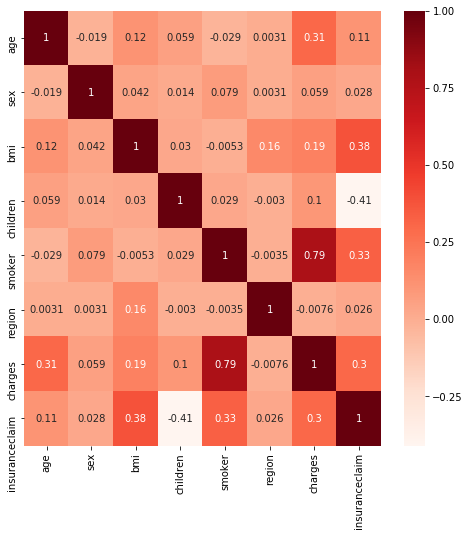

In [15]:
dfcorr = df.corr()
dfcorr
plt.figure(figsize=(8,8))
sns.heatmap(dfcorr, cmap="Reds", annot = True)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state=47)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
com = [LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
for c in com:
    c.fit(x_train,y_train)
    print(c, c.score(x_train,y_train))   # score at 0th then 1th, 2th ... position model(Logistic ..gaussianNB,SVC, Decisiontree...)
    pred=c.predict(x_test)
    print("\n accuracy score:", accuracy_score(y_test,pred))
    print("\n confusion matrix:", confusion_matrix(y_test,pred))
    print("\n classification report:", classification_report(y_test,pred))
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 0.8004561003420753

 accuracy score: 0.8263888888888888

 confusion matrix: [[133  44]
 [ 31 224]]

 classification report:               precision    recall  f1-score   support

           0       0.81      0.75      0.78       177
           1       0.84      0.88      0.86       255

   micro avg       0.83      0.83      0.83       432
   macro avg       0.82      0.81      0.82       432
weighted avg       0.83      0.83      0.83       432

GaussianNB(priors=None, var_smoothing=1e-09) 0.7730900798175598

 accuracy score: 0.7870370370370371

 confusion matrix: [[161  16]
 [ 76 179]]

 classification report:               precision    recall  f1-score   support

           0       0.68      0.91      0.78       177
       

In [19]:
#accuracy score (decision tree) = .97
#accuracy score (GaussianNB)    = .79
#accuracy score (SVC)           = .60
#accuracy score (KNeighbors)    = .60
#accuracy score (decision tree) = .75